**Storytelling Alberto Mariscal - Visualización de datos**

*Dataset Fifa 2019 Players*

1. Importamos la librerías necesarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
import re
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from PIL import Image
import warnings

2. Leemos el dataset

In [ ]:
df = pd.read_csv("/content/sample_data/data_fifa.csv", error_bad_lines=False)
normalized_data = df
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5,4,4,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5,4,5,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5,5,5,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4,3,1,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4,5,4,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51,15,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
col = df.columns
col

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [ ]:
# Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12487 entries, 0 to 12486
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                12487 non-null  int64  
 1   ID                        12487 non-null  int64  
 2   Name                      12487 non-null  object 
 3   Age                       12487 non-null  int64  
 4   Photo                     12487 non-null  object 
 5   Nationality               12487 non-null  object 
 6   Flag                      12487 non-null  object 
 7   Overall                   12487 non-null  int64  
 8   Potential                 12487 non-null  int64  
 9   Club                      12301 non-null  object 
 10  Club Logo                 12487 non-null  object 
 11  Value                     12487 non-null  object 
 12  Wage                      12487 non-null  object 
 13  Special                   12487 non-null  int64  
 14  Prefer

In [ ]:
# Observamos los valores para cada una de las columnas y así poder tener una historia global
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,12487.00000,12487.000000,12487.00000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.00000,12482.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000,12486.000000,12486.000000,12486.000000,12486.000000
mean,6243.00000,207013.505326,26.48106,69.776327,73.026508,1686.634740,1.164171,3.020902,2.52847,17.411312,53.703211,48.906222,55.622648,62.602867,46.453432,59.012973,51.252823,46.576039,56.694402,62.433891,66.154641,66.391287,65.656523,65.738368,64.661568,59.561864,66.935133,66.620966,67.981981,51.485865,59.851766,50.502523,53.681909,56.950268,51.270521,63.009770,50.471290,50.780091,48.342196,16.175062,15.986545,15.821000,16.056063,16.300096
std,3604.83074,30051.468373,4.24818,4.859555,5.620352,243.385564,0.465832,0.676814,0.77790,15.240781,18.113729,19.439806,17.102329,13.463983,17.948417,18.243674,18.527931,17.928609,14.351617,15.552820,14.509008,14.145771,14.327483,7.079423,14.053466,16.717949,11.751789,14.935643,11.791589,18.976437,16.739629,20.619723,19.343296,13.804759,15.575418,9.655274,20.032913,21.895420,21.754235,17.705113,16.900187,16.415258,17.231117,18.031620
min,0.00000,16.000000,16.00000,63.000000,63.000000,857.000000,1.000000,1.000000,1.00000,1.000000,6.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,4.000000,9.000000,5.000000,12.000000,13.000000,14.000000,41.000000,16.000000,2.000000,23.000000,12.000000,24.000000,4.000000,11.000000,6.000000,2.000000,10.000000,9.000000,3.000000,3.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3121.50000,192412.000000,23.00000,66.000000,69.000000,1591.000000,1.000000,3.000000,2.00000,7.000000,44.000000,34.000000,49.000000,59.000000,33.000000,54.000000,39.000000,33.000000,50.000000,60.000000,58.000000,59.000000,58.000000,61.000000,56.000000,52.000000,60.000000,62.000000,61.000000,39.000000,49.000000,30.000000,43.000000,48.000000,41.000000,58.000000,32.000000,30.000000,26.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,6243.00000,211840.000000,26.00000,69.000000,72.000000,1726.000000,1.000000,3.000000,3.00000,15.000000,59.000000,53.000000,59.000000,65.000000,49.000000,65.000000,55.000000,47.000000,60.000000,66.000000,68.000000,69.000000,68.000000,65.000000,67.000000,64.000000,68.000000,69.000000,69.000000,57.000000,64.000000,59.000000,60.000000,59.000000,53.000000,64.000000,58.000000,61.000000,57.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,9364.50000,228849.000000,29.00000,73.000000,77.000000,1840.000000,1.000000,3.000000,3.00000,23.000000,67.000000,65.000000,67.000000,71.000000,60.000000,71.000000,65.000000,61.000000,66.000000,71.000000,76.000000,76.000000,76.000000,70.000000,75.000000,71.000000,75.000000,76.000000,76.000000,66.000000,72.000000,67.000000,67.000000,67.000000,63.000000,69.000000,67.000000,69.000000,67.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,12486.00000,246608.000000,45.00000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.00000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95

3. Visualización de los datos

In [ ]:
# Analizamos el número de jugadores por países
national_player = df[['Nationality',"ID"]].groupby(by=['Nationality'],as_index=False).count().sort_values("ID",ascending=False)
national_player.rename(columns = {'Nationality':"country", 'ID':'player_count'}, inplace = True)
national_player = national_player.reset_index()
national_player = national_player.drop(["index"], axis=1)
national_player.head(10)

,country,player_count
0,Spain,899
1,England,865
2,Germany,801
3,Brazil,779
4,Argentina,739
5,France,672
6,Italy,564
7,Colombia,422
8,Netherlands,351
9,Portugal,303


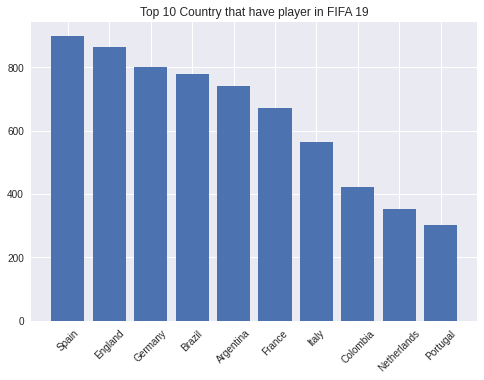

In [ ]:
# Visualizamos los datos anteriores para que sean más fáciles de entender
player_count = national_player.iloc[0:10,1]
national = national_player.iloc[0:10,0]

# select seaborn style of chart to make display more good for eyes.
plt.style.use("seaborn")
# create bar chart between most 10 country and no. of player 
plt.bar(national,player_count)
plt.xticks(rotation=45)
plt.title('Top 10 Country that have player in FIFA 19')
plt.show()

In [ ]:
# Analizamos el número de jugadores por edad
player_age = df[['Age',"ID"]].groupby(by=['Age'],as_index=False).count().sort_values("ID",ascending=False)
player_age.rename(columns = {'ID':'count'}, inplace = True)
player_age = player_age.reset_index().drop(["index"], axis=1)
player_age.head()

,Age,count
0,26,1179
1,25,1061
2,24,1043
3,27,992
4,28,953


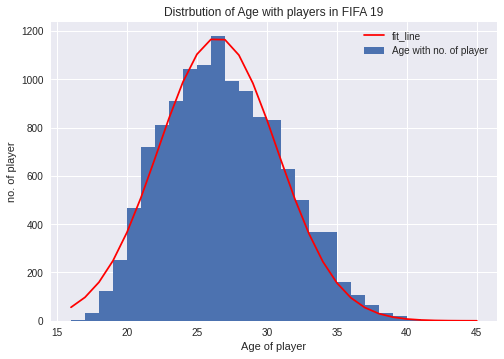

In [ ]:
# Mostramos el histograma de jugadores por edad
_,bins,_ = plt.hist(df.Age,bins=df.Age.max()-df.Age.min(),label="Age with no. of player")
mu, sigma = sp.stats.norm.fit(df.Age)
best_fit_line = sp.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, df.shape[0] * best_fit_line,label="fit_line",color="red")

plt.title('Distrbution of Age with players in FIFA 19')
plt.ylabel("no. of player")
plt.xlabel("Age of player")
plt.legend()
plt.show()

In [ ]:
# Mostramos el número de jugadores por posición de campo
player_position = df[["Position","ID"]].groupby(by=['Position'],as_index=False).count().sort_values("ID",ascending=False)
player_position.rename(columns = {'ID':'count'}, inplace = True)
player_position = player_position.reset_index().drop(["index"], axis=1)
player_position.head()

,Position,count
0,ST,1402
1,GK,1168
2,CB,1108
3,LB,906
4,RB,895


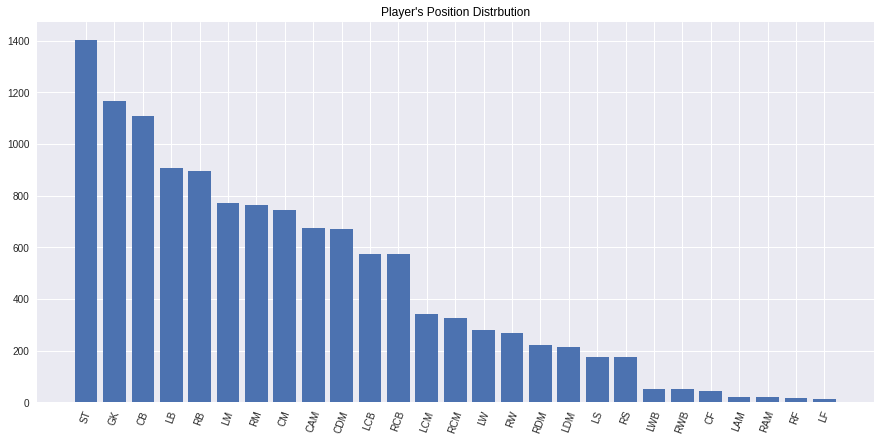

In [ ]:
# Mostramos el número de jugadores por posición de campo en un histograma
plt.figure(figsize=(15,7))
plt.bar(player_position["Position"],player_position["count"])
plt.xticks(rotation=70)
plt.title("Player's Position Distrbution", color="black")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



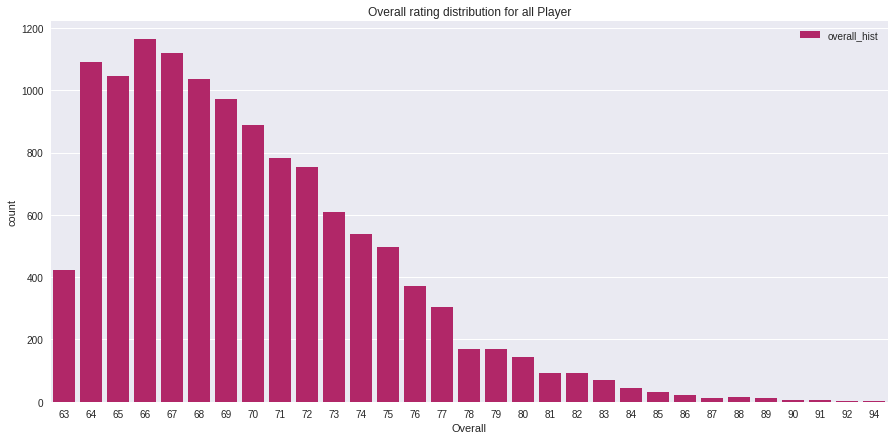

In [ ]:
# Mostramos un histograma del número de jugadores por puntuación global
plt.figure(figsize=(15, 7))
sns.countplot(df.Overall, label="overall_hist",color="#c81067")
plt.title("Overall rating distribution for all Player")
plt.legend()
plt.show()

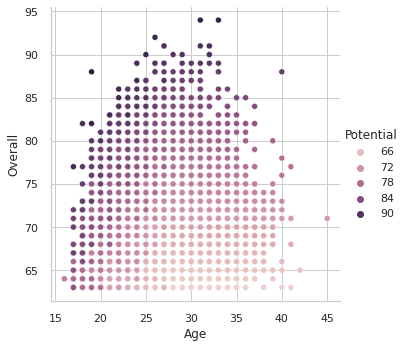

In [ ]:
# Creamos un scatterplot donde podamos ver la edad de los jugadores y la valoración global, indicando el color de la representación el potencial

sns.set(style="whitegrid")
sns.relplot(
    data = df,
    x="Age",y="Overall",hue="Potential")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Players')

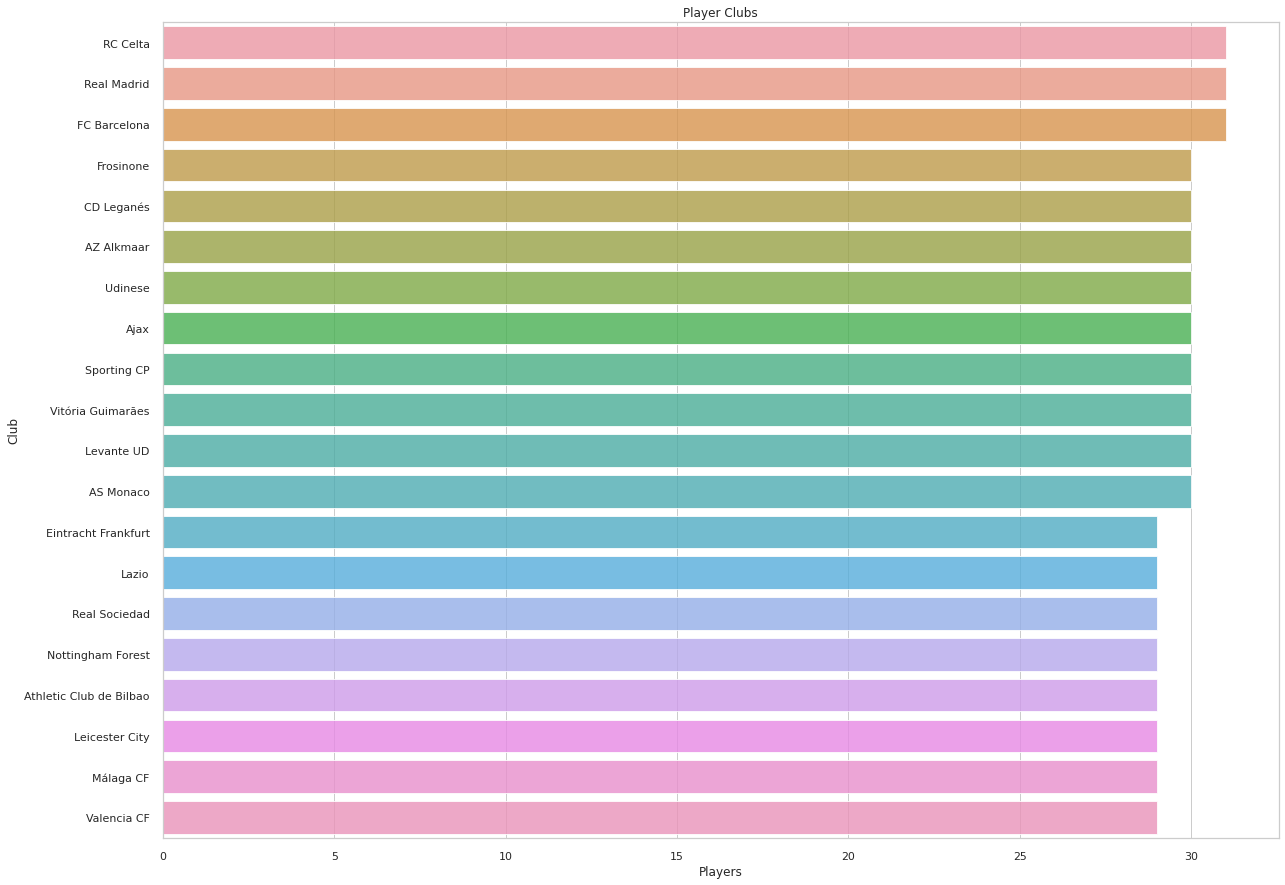

In [ ]:
# Observamos el número de jugadores por equipo
club_count = df['Club'].value_counts()
club_count = club_count[1:21]
plt.figure(figsize=(20,15))
sns.barplot(club_count.values,club_count.index,  alpha=0.8)
plt.title('Player Clubs')
plt.ylabel('Club', fontsize=12)
plt.xlabel('Players', fontsize=12)

3. Hacemos un análisis por ligas

In [ ]:
SAF = ["Aldosivi", "Argentinos Jrs.", "Atlético Tucumán", "Banfield","Belgrano","Buenos Aires","Colón","Defensa","Estudiantes","Gimnasia","Godoy Cruz",
"Huracán","Independiente","Lanús","Newell's","Patronato","Racing Club","River Plate","Rosario Central","San Lorenzo","San Martín","SM Tucumán","Talleres",
"Tigre","Unión","Vélez Sarsfield", "Boca Juniors", "Club Atlético Huracán"]
HYUNDAI_A_LEAGUE = ["Adelaide United","Brisbane Roar","Central Coast","Melb. Victory","Melbourne City","Newcastle Jets","Perth Glory","Sydney FC","Well. Phoenix","WS Wanderers",
                    "Melbourne Victory"]
O_BUNDESLIGA = ["Admira Wacker","FK Austria Wien","Innsbruck","LASK Linz","RB Salzburg","SCR Altach","SK Rapid Wien","SK Sturm Graz","SKN St. Pölten","SV Mattersburg",
                "TSV Hartberg","Wolfsberger AC", "FC Red Bull Salzburg"]
PRO_LEAGUE = ["Cercle Brugge","Club Brugge","Excel Mouscron","KAA Gent","KAS Eupen","KRC Genk","KV Kortrijk","KV Oostende","Royal Antwerp FC","RSC Anderlecht",
              "Sint-Truiden","Sp. Charleroi","Sport. Lokeren","Standard Liège","Waasl. Beveren","Zulte-Waregem", "Club Brugge KV", "Standard de Liège"]
LIGA_DO_BRASIL = ["América""Atl. Paranaense","Atlético Mineiro","Bahia","Botafogo","Ceará SC","Chapecoense","Cruzeiro","Fluminense","Grêmio","Internacional","Paraná",
                  "Santos","Sport","Vitória"]
CAMP_SCOTIABANK = ["Audax Italiano","CD Antofagasta","CD Huachipato","CD O'Higgins","CD Palestino","CD Viñazur","Curicó Unido","Depor. Iquique","Deportes Temuco",
                   "Everton de Viña","San Luis","Uni. Católica","Uni. Concepción","Uni. de Chile","Unión Española","Unión La Calera"]
CSL = ["Beijing Guoan","Beijing Renhe","Changchun Yatai","Chongqing SWM","Dalian Yifang","Guangzhou","Guangzhou R&F","Guizhou Hengfeng","Hebei CFFC","Henan Jianye",
       "Jiangsu Suning","Shandong Luneng","Shanghai Shenhua","Shanghai SIPG","Tianjin Quanjian","Tianjin TEDA", "Guangzhou Evergrande Taobao FC", "Dalian YiFang FC",
       "Shanghai SIPG FC", "Beijing Sinobo Guoan FC", "Tianjin Quanjian FC", "Guangzhou R&F; FC", "Beijing Renhe FC", "Hebei China Fortune FC", "Jiangsu Suning FC",
       "Shanghai Greenland Shenhua FC", "Changchun Yatai FC", "Guizhou Hengfeng FC"]
LIGA_DIMAYOR = ["Al. Petrolera","América de Cali","Atl. Bucaramanga","Atl. Nacional","Atlético Huila","Boyacá Chicó","Deportes Tolima","Deportivo Cali",
                "Deportivo Pasto","Envigado","Ind. Santa Fe","Indep. Medellín","Jaguares","Junior","La Equidad","Leones","Millonarios","Once Caldas","Patriotas",
                "Rionegro Águilas"]
SUPERLIGA = ["Aalborg BK","Aarhus GF","AC Horsens","Brøndby IF","Esbjerg fB","FC København","FC Midtjylland","FC Nordsjælland","Hobro IK","Odense BK","Randers FC",
             "SønderjyskE","Vejle Boldklub","Vendsyssel FF"]
PREMIER_LEAGUE = ["Arsenal","Bournemouth","Brighton","Burnley","Cardiff City","Chelsea","Crystal Palace","Everton","Fulham","Huddersfield","Leicester City",
                  "Liverpool","Manchester City","Manchester United","Newcastle Utd","Southampton","Spurs","Watford","West Ham","Wolves", "Tottenham Hotspur", 
                  "West Ham United", "Wolverhampton Wanderers", "Brighton & Hove Albion", "Newcastle United", "Huddersfield Town"]
EFL_CHAMPIONSHIP = ["Aston Villa","Birmingham City","Blackburn Rovers","Bolton","Brentford","Bristol City","Derby County","Hull City","Ipswich","Leeds United",
                    "Middlesbrough","Millwall","Norwich","Nott'm Forest","Preston","QPR","Reading","Rotherham Utd","Sheffield Utd","Sheffield Wed","Stoke City",
                    "Swansea City","West Brom","Wigan Athletic", "West Bromwich Albion"]
EFL_LEAGUE_ONE = ["Accrington","AFC Wimbledon","Barnsley","Blackpool","Bradford City","Bristol Rovers","Burton Albion","Charlton Ath","Coventry City","Doncaster",
                  "Fleetwood Town","Gillingham","Luton Town","Oxford United","Peterborough","Plymouth Argyle","Portsmouth","Rochdale","Scunthorpe Utd","Shrewsbury",
                  "Southend United","Sunderland","Walsall","Wycombe"]
EFL_LEAGUE_TWO = ["Bury","Cambridge Utd","Carlisle United","Cheltenham Town","Colchester","Crawley Town","Crewe Alexandra","Exeter City",
                  "Forest Green","Grimsby Town","Lincoln City","Macclesfield","Mansfield Town","MK Dons","Morecambe","Newport County","Northampton",
                  "Notts County","Oldham Athletic","Port Vale","Stevenage","Swindon Town","Tranmere Rovers","Yeovil Town"]
LIGUE_1 = ["Amiens SC","Angers SCO","AS Monaco","ASSE","Dijon FCO","EA Guingamp","FC Nantes","Girondins de Bx","LOSC Lille","Montpellier HSC","Nîmes Olympique",
           "OGC Nice","OL","OM","Paris","RC Strasbourg","SM Caen","Stade de Reims","Stade Rennais","Toulouse FC", "Paris Saint-Germain", "Olympique Lyonnais","Olympique de Marseille",
           "AS Saint-Étienne", "Stade Rennais FC", "Stade Malherbe Caen", "Toulouse Football Club", "FC Girondins de Bordeaux"]
LIGUE_2 = ["AC Ajaccio","AJ Auxerre","AS Béziers","Chamois FC","Clermont Foot","ESTAC Troyes","FC Lorient","FC Metz","FCSM","Gazélec Ajaccio","Grenoble Foot",
           "Havre AC","La Berrichonne","Nancy","Paris FC","RC Lens","Red Star FC","Stade Brestois","US Orléans","Valenciennes FC"]
BUNDESLIGA = ["1. FC Nürnberg","1. FSV Mainz 05","Dortmund","Düsseldorf","FC Augsburg","FC Bayern","Frankfurt","Hannover 96","Hertha BSC","Leverkusen","M'gladbach",
              "RB Leipzig","SC Freiburg","Schalke","TSG Hoffenheim","VfB Stuttgart","VfL Wolfsburg","Werder Bremen", "FC Bayern München", "Borussia Dortmund","FC Schalke 04",
              "Bayer 04 Leverkusen", "1. FC Köln", "TSG 1899 Hoffenheim", "Borussia Mönchengladbach", "SV Werder Bremen", "Eintracht Frankfurt"]
BUNDESLIGA_2 = ["Aue","Bielefeld","Bochum","Darmstadt","Dresden","Duisburg","Fürth","Hamburg","Heidenheim","Ingolstadt","Kiel","Köln","Magdeburg","Paderborn","Regensburg",
                "Sandhausen","St. Pauli","Union Berlin", "Hamburger SV"]
Three_LIGA = ["1860 München","Braunschweig","Carl Zeiss Jena","Energie Cottbus","Fortuna Köln","FSV Zwickau","Hallescher FC","Hansa Rostock","Kaiserslautern","Karlsruher SC",
              "KFC Uerdingen","Preußen Münster","S. Großaspach","Sportfreunde Lotte","SV Meppen","SV Wehen","Unterhaching","VfL Osnabrück","VfR Aalen","Würzburg"]
SSE_AIRTRICITY_LEAGUE = ["Bohemian FC","Bray Wanderers","Cork City","Derry City","Dundalk","Limerick FC","Shamrock Rovers","Sligo Rovers","St. Pats","Waterford FC"]
SERIE_A_TIM = ["Atalanta","Bologna","Cagliari","Chievo Verona","Empoli","Fiorentina","Frosinone","Genoa","Inter","Juventus","Lazio","Milan","Napoli","Parma","Roma",
               "Sampdoria","Sassuolo","SPAL","Torino","Udinese"]
CALCIO_B = ["Ascoli","Benevento","Brescia", "Carpi", "Cittadella", "Cosenza", "Cremona", "Crotone","Foggia", "Hellas Verona","La Spezia", "Lecce", "Livorno", "Padova", 
            "Palermo", "Perugia", "Pescara", "Salerno","Venezia"]
MEIJI_YASUDAJ1 = ["Cerezo Osaka","F.C. Tokyo","Gamba Osaka","H.Consa.Sapporo","Júbilo Iwata","Kashima Antlers","Kashiwa Reysol","Kawasaki-F","Nagoya Grampus","Sagan Tosu",
                  "Shimizu S-Pulse","S-Hiroshima","Shonan Bellmare","Urawa Reds","Vegalta Sendai","Vissel Kobe","V-Varen Nagasaki","Yokohama F･M"]
KLEAGUE1 = ["Daegu FC","FC Seoul","Gangwon FC","Gyeongnam FC","Incheon United","Jeju United","Jeonbuk Hyundai","Jeonnam Dragons","Pohang Steelers","Sangju Sangmu",
            "Suwon Samsung","Ulsan Hyundai"]
LIGA_BANCOMER_MX = ["América","Atlas","Cruz Azul","Guadalajara","León","Lobos","Monarcas Morelia","Monterrey","Necaxa","Pachuca","Puebla","Querétaro","Santos Laguna",
                    "Tigres","Tijuana","Toluca","U.N.A.M.","Veracruz", "Tigres U.A.N.L.", "América FC (Minas Gerais)"]
EREDIVISIE = ["ADO Den Haag","Ajax","AZ","De Graafschap","Excelsior","FC Emmen","FC Groningen","FC Utrecht","Feyenoord","Fortuna Sittard","Heracles Almelo",
              "NAC Breda","PEC Zwolle","PSV","SC Heerenveen","Vitesse","VVV-Venlo","Willem II"]
ELITESERIEN = ["FK Bodø/Glimt","FK Haugesund","IK Start","Kristiansund","Lillestrøm SK","Molde FK","Odds BK","Ranheim Fotball","Rosenborg BK","Sandefjord","Sarpsborg 08 FF",
               "SK Brann","Stabæk Fotball","Strømsgodset IF","Tromsø IL","Vålerenga Fotball"]
EKSTRAKLASA = ["Arka Gdynia","Cracovia","Górnik Zabrze","Jagiellonia","Korona Kielce","Lech Poznań","Lechia Gdańsk","Legia Warszawa","Miedź Legnica","Piast Gliwice",
               "Pogoń Szczecin","Śląsk Wrocław","Wisła Kraków","Wisła Płock","Z. Sosnowiec","Zagłębie Lubin"]
LIGA_NOS = ["Belenenses","Boavista FC","CD Feirense","CD Tondela","Desportivo Aves","FC Porto","Funchal","GD Chaves","Marítimo","Moreirense FC","Portimonense SC",
            "Rio Ave FC","Santa Clara","SC Braga","SL Benfica","Sporting CP","V. Guimarães","V. Setúbal"]
REST_OF_WORLD = ["AEK Athens","CSKA Moscow","Dinamo Zagreb","Dynamo Kyiv","HJK Helsinki","Kaizer Chiefs","Lokomotiv Moscow","Olympiacos CFP","Orlando Pirates",
                 "Panathinaikos","PAOK","Shakhtar Donetsk","Slavia Praha","Sparta Praha","Spartak Moscow","Viktoria Plzeň", "PFC CSKA Moscow"]
SAUDI_PROFESSIONAL_LEAGUE = ["Al Ahli","Al Batin","Al Faisaly","Al Fateh","Al Fayha","Al Hazem","Al Hilal","Al Ittihad","Al Nassr","Al Qadisiyah","Al Raed",
                             "Al Shabab","Al Wehda","Al Taawoun","Ettifaq FC","Ohod Club"]
SCOTTISH_PREMIERSHIP = ["Aberdeen","Celtic","Dundee FC","Hamilton","Hearts","Hibernian","Kilmarnock","Livingston","Motherwell","Rangers","St. Johnstone","St. Mirren"]
LALIGA_SANTANDER = ["Athletic Club","Atlético Madrid","CD Leganés","D. Alavés","FC Barcelona","Getafe CF","Girona FC","Levante UD","R. Valladolid CF","Rayo Vallecano",
          "RC Celta","RCD Espanyol","Real Betis","Real Madrid","Real Sociedad","SD Eibar","SD Huesca","Sevilla FC","Valencia CF","Villarreal CF", "Athletic Club de Bilbao",
          "Deportivo Alavés", "Real Valladolid CF"]
LALIGA_123 = ["AD Alcorcón","Albacete BP","CA Osasuna","Cádiz CF","CD Lugo","CD Numancia","CD Tenerife","CF Rayo","CF Reus","Córdoba CF","Elche CF",
              "Extremadura UD","Granada CF","Málaga CF","Nàstic","R. Oviedo","R. Sporting","R. Zaragoza","RC Deportivo","RCD Mallorca","UD Almería","UD Las Palmas"]
ALLSVENSKAN = ["AIK","BK Häcken","Brommapojkarna","Dalkurd FF","Djurgårdens IF","GIF Sundsvall","Hammarby IF","IF Elfsborg","IFK Göteborg","IFK Norrköping","IK Sirius",
               "Kalmar FF","Malmö FF","Örebro SK","Östersunds FK","Trelleborgs FF"]
RAIFFEISEN_SUPER_LEAGUE = ["BSC Young Boys","FC Basel","FC Lugano","FC Luzern","FC Sion","FC St. Gallen","FC Thun","FC Zürich","Grasshopper Club","Neuchâtel Xamax", "FC Basel 1893"]
SUPER_LIG = ["Akhisarspor","Alanyaspor","Antalyaspor","Başakşehir","BB Erzurumspor","Beşiktaş","Bursaspor","Çaykur Rizespor","Fenerbahçe","Galatasaray","Göztepe",
             "Kasimpaşa","Kayserispor","Konyaspor","MKE Ankaragücü","Sivasspor","Trabzonspor","Yeni Malatyaspor", "Beşiktaş JK", "Medipol Başakşehir FK", "Galatasaray SK", 
             "Fenerbahçe SK", "Kasimpaşa SK"]
MLS = ["Atlanta United","Chicago Fire","Colorado Rapids","Columbus Crew SC","D.C. United","FC Dallas","Houston Dynamo","Impact Montréal","LAFC","LA Galaxy","Minnesota United",
       "New England","New York City FC","NY Red Bulls","Orlando City","Philadelphia","Portland Timbers","Real Salt Lake","Seattle Sounders","SJ Earthquakes","Sporting KC",
       "Toronto FC","Whitecaps FC", "Los Angeles FC", "Montreal Impact", "DC United", "Seattle Sounders FC"]

In [ ]:
conditions = [(df['Club'].isin(SAF)),
              (df['Club'].isin(HYUNDAI_A_LEAGUE)),
              (df['Club'].isin(O_BUNDESLIGA)),
              (df['Club'].isin(PRO_LEAGUE)),
              (df['Club'].isin(LIGA_DO_BRASIL)),
              (df['Club'].isin(CAMP_SCOTIABANK)),
              (df['Club'].isin(CSL)),
              (df['Club'].isin(LIGA_DIMAYOR)),
              (df['Club'].isin(SUPERLIGA)),
              (df['Club'].isin(PREMIER_LEAGUE)),
              (df['Club'].isin(EFL_CHAMPIONSHIP)),
              (df['Club'].isin(EFL_LEAGUE_ONE)),
              (df['Club'].isin(EFL_LEAGUE_TWO)),
              (df['Club'].isin(LIGUE_1)),
              (df['Club'].isin(LIGUE_2)),
              (df['Club'].isin(BUNDESLIGA)),
              (df['Club'].isin(BUNDESLIGA_2)),
              (df['Club'].isin(Three_LIGA)),
              (df['Club'].isin(SSE_AIRTRICITY_LEAGUE)),
              (df['Club'].isin(SERIE_A_TIM)),
              (df['Club'].isin(CALCIO_B)),
              (df['Club'].isin(MEIJI_YASUDAJ1)),
              (df['Club'].isin(KLEAGUE1)),
              (df['Club'].isin(LIGA_BANCOMER_MX)),
              (df['Club'].isin(EREDIVISIE)),
              (df['Club'].isin(ELITESERIEN)),
              (df['Club'].isin(EKSTRAKLASA)),
              (df['Club'].isin(LIGA_NOS)),
              (df['Club'].isin(REST_OF_WORLD)),
              (df['Club'].isin(SAUDI_PROFESSIONAL_LEAGUE)),
              (df['Club'].isin(SCOTTISH_PREMIERSHIP)),
              (df['Club'].isin(LALIGA_SANTANDER)),
              (df['Club'].isin(LALIGA_123)),
              (df['Club'].isin(ALLSVENSKAN)),
              (df['Club'].isin(RAIFFEISEN_SUPER_LEAGUE)),
              (df['Club'].isin(SUPER_LIG)),
              (df['Club'].isin(MLS))
]
values = ['SAF', 'HYUNDAI A-LEAGUE', 'Ö. BUNDESLIGA', 'PRO LEAGUE', 'LIGA DO BRASIL', 'CAMP. SCOTIABANK', 'CSL', 'LIGA DIMAYOR', 'SUPERLIGA', 'PREMIER LEAGUE', 'EFL CHAMPIONSHIP',
          'EFL LEAGUE ONE', 'EFL LEAGUE TWO', 'LIGUE 1 CONFORAMA', "DOMINO'S LIGUE 2", 'BUNDESLIGA', 'BUNDESLIGA 2', '3. LIGA', 'SSE AIRTRICITY LEAGUE', 'SERIE A TIM', 'CALCIO B',
          'MEIJI YASUDA J1', 'K-LEAGUE 1', 'LIGA BANCOMER MX', 'EREDIVISIE', 'ELITESERIEN', 'EKSTRAKLASA', 'LIGA NOS', 'REST OF WORLD', 'SAUDI PROFESSIONAL LEAGUE', 'SCOTTISH PREMIERSHIP',
          'LALIGA SANTANDER', 'LALIGA 1 | 2 | 3', 'ALLSVENSKAN', 'RAIFFEISEN SUPER LEAGUE', 'SÜPER LIG', 'MLS'
          ]

df['League'] = np.select(conditions, values)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'League')

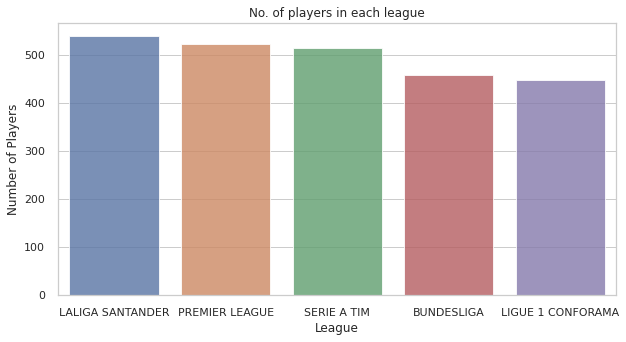

In [ ]:
# Observamos el número de jugadores por liga
league_count = df['League'].value_counts()
league_count = league_count[1:6]
plt.figure(figsize=(10,5))
sns.barplot(league_count.index, league_count.values, alpha=0.8)
plt.title('No. of players in each league')
plt.ylabel('Number of Players', fontsize=12)
plt.xlabel('League', fontsize=12)

In [ ]:
  cal_df = df[['Name', 'Age','Overall', 'Potential', 'Club', 'Value',
       'Wage','League' ]]
cal_df

,Name,Age,Overall,Potential,Club,Value,Wage,League
0,L. Messi,31,94,94,FC Barcelona,€110.5M,€565K,LALIGA SANTANDER
1,Cristiano Ronaldo,33,94,94,Juventus,€77M,€405K,SERIE A TIM
2,Neymar Jr,26,92,93,Paris Saint-Germain,€118.5M,€290K,LIGUE 1 CONFORAMA
3,De Gea,27,91,93,Manchester United,€72M,€260K,PREMIER LEAGUE
4,K. De Bruyne,27,91,92,Manchester City,€102M,€355K,PREMIER LEAGUE
...,...,...,...,...,...,...,...,...
12482,S. Puttkammer,29,63,63,SV Meppen,€290K,€1K,3. LIGA
12483,B. Baiye,17,63,83,Club Brugge KV,€650K,€2K,PRO LEAGUE
12484,A. Andersson,27,63,67,Östersunds FK,€325K,€1K,ALLSVENSKAN
12485,D. Schad,21,63,70,1. FC Kaiserslautern,€450K,€1K,0


In [ ]:
cal_df['Value'] = cal_df['Value'].replace({'K': '*1e3', 'M': '*1e6', '€':''}, regex=True).map(pd.eval).astype(int)
cal_df['Wage'] = cal_df['Wage'].replace({'K': '*1e3', 'M': '*1e6', '€':''}, regex=True).map(pd.eval).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



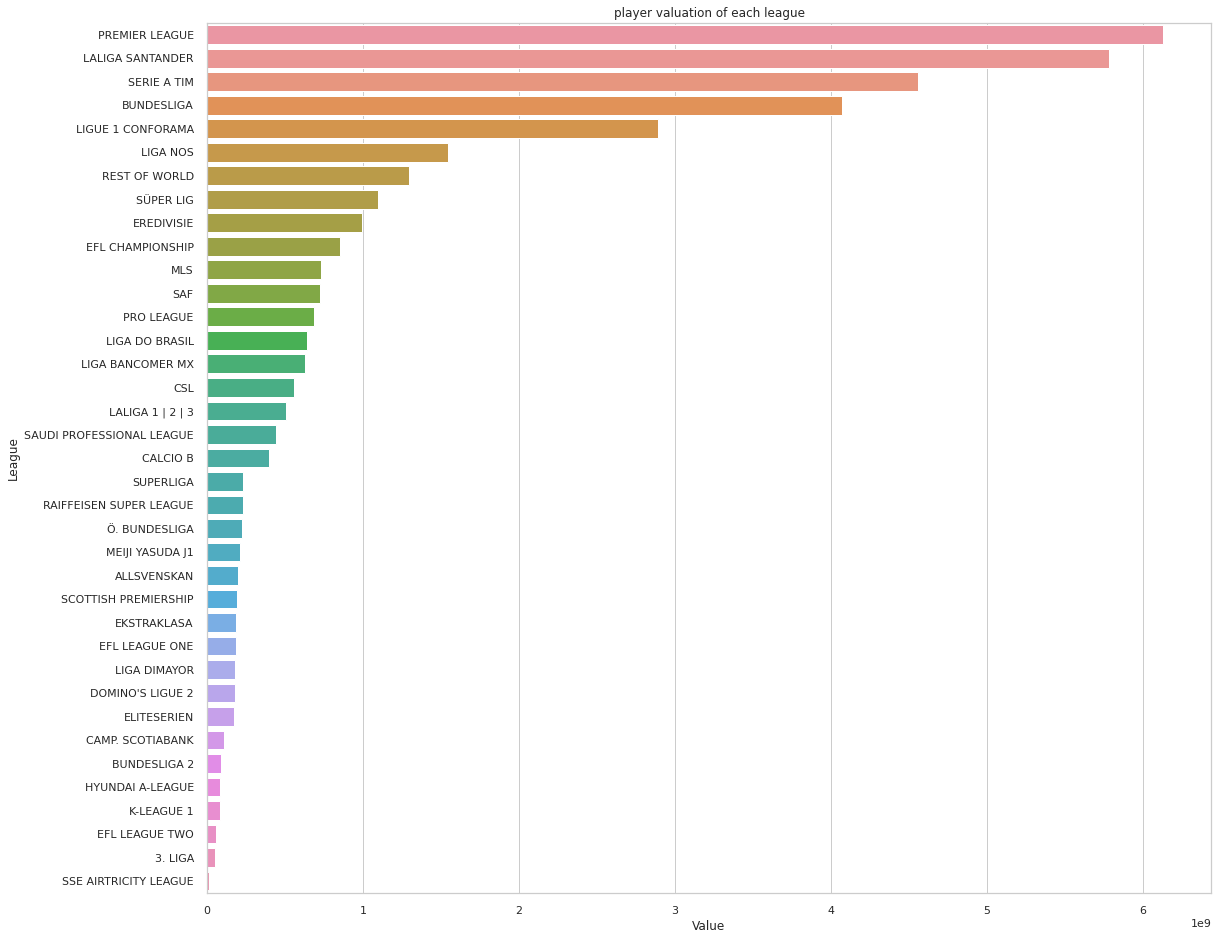

In [ ]:
cal_df2 = cal_df.groupby(["League"]).Value.sum().reset_index()
cal_df2 = cal_df2.sort_values('Value', ascending=False)

cal_df2 = cal_df2.drop(0)
cal_df2 = cal_df2.reset_index()
cal_df2 = cal_df2.drop(columns=['index'], axis=1)

f, ax = plt.subplots(figsize=(18, 16))
sns.barplot(x="Value", y="League", data=cal_df2)
plt.title('player valuation of each league')
plt.show()

4. Scouting

In [ ]:
from sklearn.preprocessing import MinMaxScaler

speciality_conditions = [
    ((((df['Finishing'] > 85) & (df['HeadingAccuracy'] > 85) & (df['Work Rate'] != 'High/ High') & (df['Work Rate'] != 'High/ Low') & (df['Work Rate'] != 'High/ Medium')) 
     & (((df['LongShots'] > 80) & (df['Finishing'] > 86)) | ((df['SprintSpeed'] > 90) & (df['Acceleration'] > 90)) | ((df['HeadingAccuracy'] > 75) & (df['Jumping'] > 85) & (df['Strength'] > 85)) |
        ((df['Dribbling'] > 86) & (df['Balance'] > 75)) | ((df['Strength'] > 86) & (df['Weight'] > '182lbs')))) | (((df['LongShots'] > 80) & (df['Finishing'] > 86)) & 
        (((df['SprintSpeed'] > 90) & (df['Acceleration'] > 90)) | ((df['HeadingAccuracy'] > 75) & (df['Jumping'] > 85) & (df['Strength'] > 85)) 
        | ((df['Dribbling'] > 86) & (df['Balance'] > 75)) | ((df['Strength'] > 86) & (df['Weight'] > '182lbs'))))),
    (((df['ShortPassing'] > 86) & (df['LongPassing'] > 73) & (df['Vision'] > 86)) & (((df['Stamina'] > 86) & (df['Work Rate'] == 'High/ High')) 
    | ((df['Crossing'] > 86) & (df['Curve'] > 80)) | ((df['Dribbling'] > 86) & (df['Balance'] > 75)) | ((df['LongShots'] > 87) & (df['ShotPower'] > 87)) 
    | ((df['FKAccuracy'] > 86) & (df['Curve'] > 85) & (df['ShotPower'] > 85)) | ((df['LongShots'] > 80) & (df['Finishing'] > 86)) 
    | ((df['StandingTackle'] > 86) & (df['SlidingTackle'] > 85)))),
    (((df['StandingTackle'] > 86) & (df['SlidingTackle'] > 85)) & (((df['Agility'] > 86) & (df['Reactions'] > 80)) | ((df['Strength'] > 86) & (df['Weight'] > '182lbs')) 
    | ((df['HeadingAccuracy'] > 75) & (df['Jumping'] > 85) & (df['Strength'] > 85)))),
    (df['Finishing'] > 85) & (df['HeadingAccuracy'] > 85) & (df['Work Rate'] != 'High/ High') & (df['Work Rate'] != 'High/ Low') & (df['Work Rate'] != 'High/ Medium'),
    (df['LongShots'] > 87) & (df['ShotPower'] > 87),
    (df['LongShots'] > 80) & (df['Finishing'] > 86),
    (df['HeadingAccuracy'] > 75) & (df['Jumping'] > 85) & (df['Strength'] > 85), 
    (df['FKAccuracy'] > 86) & (df['Curve'] > 85) & (df['ShotPower'] > 85),
    (df['Dribbling'] > 86) & (df['Balance'] > 75),
    (df['ShortPassing'] > 86) & (df['LongPassing'] > 73) & (df['Vision'] > 86),
    (df['Crossing'] > 86) & (df['Curve'] > 80),
    (df['Stamina'] > 86) & (df['Work Rate'] == 'High/ High'),
    (df['StandingTackle'] > 86) & (df['SlidingTackle'] > 85),
    (df['SprintSpeed'] > 90) & (df['Acceleration'] > 90),
    (df['Strength'] > 86) & (df['Weight'] > '182lbs'),
    (df['Interceptions'] > 86) & (df['Reactions'] > 80),
    (df['Agility'] > 86) & (df['Reactions'] > 80),
    (df['Position'] == 'GK')]

speciality_values = ['Complete Forward', 'Complete Midfielder', 'Complete Defender', 'Poacher', 'Distance Shooter', 'Clinical Finisher', 'Aerial Threat', 'Free Kick Specialist', 'Dribbler', 'Playmaker', 'Crosser', 'Engine', 
                     'Tackler', 'Speedster', 'Strength', 'Tactician', 'Acrobat', 'Goalkeeper'  ]

df['Speciality'] = np.select(speciality_conditions, speciality_values)

normalized_data = df

#normalized_data = normalized_data.drop(columns=['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
#       'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
#       'Skill Moves', 'Work Rate', 'Position', 'Jersey Number', 'Joined',
#       'Loaned From', 'Contract Valid Until', 'Release Clause', 'League','Height', 'Weight', 'Speciality', 'Name', 'GKDiving', 'GKHandling',
#       'GKKicking', 'GKPositioning', 'GKReflexes', 'Photo', 'Flag', 'Club Logo'],axis=1)




In [ ]:
normalized_data2 = normalized_data[['Crossing',	'Finishing',	'HeadingAccuracy',	'ShortPassing',	'Volleys',	'Dribbling',	'Curve',	'FKAccuracy',	'LongPassing',	'LongShots',	'Aggression',	'Interceptions',	'Positioning',	'Vision',	'Penalties'	,'Composure'	,'Marking',	'StandingTackle',	'SlidingTackle']]

In [ ]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(normalized_data2)
normalized_data2.loc[:,:] = scaled_values
normalized_data2['Name'] = df['Name']
col_name = "Name"
first_col = normalized_data2.pop(col_name)
normalized_data2.insert(0, col_name, first_col)
normalized_data = normalized_data2.dropna()
normalized_data


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,L. Messi,0.896552,1.000000,0.733333,0.965116,0.953488,1.000000,0.988636,1.000000,0.928571,1.000000,0.440476,0.186047,0.989247,1.000000,0.795181,1.000000,0.329670,0.285714,0.252874
1,Cristiano Ronaldo,0.896552,0.989247,0.944444,0.860465,0.965116,0.903226,0.852273,0.800000,0.809524,0.988889,0.619048,0.267442,1.000000,0.857143,0.915663,0.989247,0.274725,0.318681,0.218391
2,Neymar Jr,0.839080,0.913978,0.644444,0.895349,0.930233,0.989247,0.931818,0.922222,0.821429,0.866667,0.535714,0.348837,0.935484,0.916667,0.867470,0.978495,0.263736,0.241758,0.333333
3,De Gea,0.126437,0.118280,0.188889,0.500000,0.104651,0.150538,0.170455,0.166667,0.500000,0.088889,0.321429,0.279070,0.107527,0.690476,0.373494,0.698925,0.131868,0.208791,0.103448
4,K. De Bruyne,1.000000,0.860215,0.566667,0.988372,0.906977,0.881720,0.897727,0.877778,0.976190,0.966667,0.773810,0.639535,0.913978,1.000000,0.843373,0.913978,0.714286,0.615385,0.540230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12482,S. Puttkammer,0.172414,0.182796,0.677778,0.639535,0.267442,0.268817,0.261364,0.255556,0.607143,0.133333,0.678571,0.697674,0.268817,0.333333,0.301205,0.698925,0.648352,0.670330,0.609195
12483,B. Baiye,0.344828,0.322581,0.588889,0.686047,0.279070,0.569892,0.318182,0.344444,0.559524,0.288889,0.500000,0.651163,0.397849,0.428571,0.469880,0.559140,0.626374,0.703297,0.643678
12484,A. Andersson,0.068966,0.096774,0.133333,0.197674,0.104651,0.096774,0.147727,0.122222,0.119048,0.111111,0.023810,0.174419,0.096774,0.238095,0.096386,0.430108,0.098901,0.164835,0.126437
12485,D. Schad,0.620690,0.311828,0.488889,0.616279,0.372093,0.591398,0.500000,0.322222,0.464286,0.333333,0.452381,0.569767,0.473118,0.357143,0.397590,0.440860,0.626374,0.659341,0.643678


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from math import pi

def get_similar_players(player_name):
  player_index = [list(normalized_data['Name']).index(x) for x in list(normalized_data['Name']) if player_name in x]
  player_index = int(player_index[0])
  # print(player_index)
  df = normalized_data.iloc[:,1:]
  cos = cosine_similarity(df, df)
  player_cos = sorted(list(cos[player_index]))[-4:-1]
  indexes = [list(cos[player_index]).index(x) for x in player_cos]
  indexes.append(player_index)
  plot_df = normalized_data.iloc[indexes]
  plot_df1 = plot_df
  plot_df1.reset_index(drop=True, inplace=True)
  plot_df1.reindex(index=range(0,5))
  plot_categories = list(plot_df1)[1:]
  plot_values = plot_df1.mean().values.flatten().tolist()
  plot_values += values[:1]
  angles = [n/ float(len(plot_categories)) *2 * pi for n in range(len(plot_categories))]
  angles += angles[:1]
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10),subplot_kw=dict(polar=True))
  plt.xticks(angles[:-1], plot_categories, color='grey', size=12)
  plt.yticks(np.arange(0.0, 1.2,0.2), ['0', '20','40','60','80','100'],color='grey', size=12)
  plt.ylim(0, 1)
  ax.set_rlabel_position(30)
  for i in range(len(plot_df1)):
    val_c1 = plot_df1.loc[i].drop('Name').values.flatten().tolist()
    val_c1 += val_c1[:1]
    ax.plot(angles, val_c1, linewidth=1.5, linestyle='solid',label=plot_df1.loc[i]["Name"])
    ax.fill(angles, val_c1, alpha=0.1)
  plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
  return player_cos, normalized_data.iloc[indexes], plt.show()

In [ ]:
from ipywidgets import interact
interact(get_similar_players, player_name = normalized_data2.Name)

interactive(children=(Dropdown(description='player_name', options=('L. Messi', 'Cristiano Ronaldo', 'Neymar Jr…

<function __main__.get_similar_players>